In [1]:
# Import libraries necessary for this project
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
bos1 = pd.read_csv('cereal.csv')
print(bos1)

                                      name mfr type  calories  protein  fat  \
0                                100% Bran   N    C        70        4    1   
1                        100% Natural Bran   Q    C       120        3    5   
2                                 All-Bran   K    C        70        4    1   
3                All-Bran with Extra Fiber   K    C        50        4    0   
4                           Almond Delight   R    C       110        2    2   
5                  Apple Cinnamon Cheerios   G    C       110        2    2   
6                              Apple Jacks   K    C       110        2    0   
7                                  Basic 4   G    C       130        3    2   
8                                Bran Chex   R    C        90        2    1   
9                              Bran Flakes   P    C        90        3    0   
10                            Cap'n'Crunch   Q    C       120        1    2   
11                                Cheerios   G    C 

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000263318CB358>]],
      dtype=object)

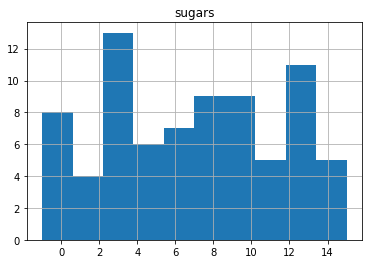

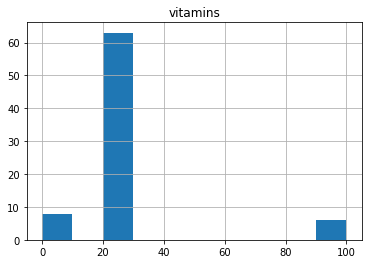

In [2]:
dataframe = pd.DataFrame(bos1) 

dataframe.hist(column='sugars')
dataframe.hist(column='vitamins')

In [3]:
dataframe['manufactures'] = dataframe['mfr'].map({'N': 'Nabisco',
'Q': 'Quaker Oats',
'K': 'Kelloggs',
'R': 'Raslston Purina',
'G': 'General Mills' ,
'P' :'Post' ,
'A':'American Home Foods Products'})

dataframe

,name,mfr,type,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups,rating,manufactures
0,100% Bran,N,C,70,4,1,130,10.0,5.0,6,280,25,3,1.00,0.33,68.402973,Nabisco
1,100% Natural Bran,Q,C,120,3,5,15,2.0,8.0,8,135,0,3,1.00,1.00,33.983679,Quaker Oats
2,All-Bran,K,C,70,4,1,260,9.0,7.0,5,320,25,3,1.00,0.33,59.425505,Kelloggs
3,All-Bran with Extra Fiber,K,C,50,4,0,140,14.0,8.0,0,330,25,3,1.00,0.50,93.704912,Kelloggs
4,Almond Delight,R,C,110,2,2,200,1.0,14.0,8,-1,25,3,1.00,0.75,34.384843,Raslston Purina
5,Apple Cinnamon Cheerios,G,C,110,2,2,180,1.5,10.5,10,70,25,1,1.00,0.75,29.509541,General Mills
6,Apple Jacks,K,C,110,2,0,125,1.0,11.0,14,30,25,2,1.00,1.00,33.174094,Kelloggs
7,Basic 4,G,C,130,3,2,210,2.0,18.0,8,100,25,3,1.33,0.75,37.038562,General Mills
8,Bran Chex,R,C,90,2,1,200,4.0,15.0,6,125,25,1,1.00,0.67,49.120253,Raslston Purina
9,Bran Flakes,P,C,90,3,0,210,5.0,13.0,5,190,25,3,1.00,0.67,53.313813,Post


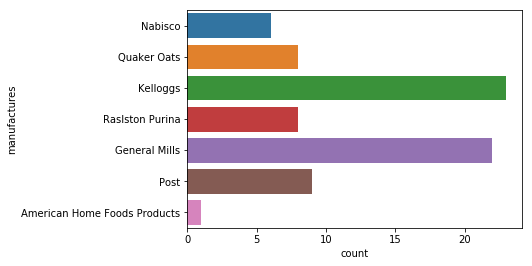

In [5]:
import seaborn as sns
p = sns.countplot(data=dataframe, y = 'manufactures')

In [6]:
x = bos1.iloc[:,3:15] 
y = bos1["rating"]

from sklearn.model_selection import train_test_split
#testing data size is of 25% of entire data
x_train, x_test, y_train, y_test =train_test_split(x,y, test_size = 0.25, random_state =5)

In [7]:
from sklearn.linear_model import LinearRegression
#fitting our model to train and test
lm = LinearRegression()
model = lm.fit(x_train,y_train)

In [8]:
pred_y = lm.predict(x_test)
predictions_test = lm.predict(x_test)
predictions_train = lm.predict(x_train)

In [9]:
# Calculate the root mean square error (RMSE) for test and training data
N = len(y_test)
rmse_test = np.sqrt(np.sum((np.array(y_test).flatten() - np.array(predictions_test).flatten())**2)/N)
print("RMSE TEST: ", rmse_test)     

N = len(y_train)
rmse_train = np.sqrt(np.sum((np.array(y_train).flatten() - np.array(predictions_train).flatten())**2)/N)
print("RMSE train: ", rmse_train) 

RMSE TEST:  3.8746120508001013e-07
RMSE train:  2.5518727287914476e-07
